In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model outputs from your file
with open('Models/model2_vmem_248.pkl', 'rb') as f:
    model2_outputs = pickle.load(f)

# Extract predictions and ground truths from the loaded dictionary
predictions1 = model2_outputs.get('predictions', None)
ground_truths1 = model2_outputs.get('ground_truths', None)

# Check if the data was loaded correctly
if predictions1 is None or ground_truths1 is None:
    raise ValueError("Predictions or ground_truths not found in the file.")

Custom function to calculate AUC-ROC

In [7]:
def calculate_roc_auc(predictions, ground_truths):
    # Ensure predictions are 1D
    preds = predictions1.flatten()
    
    # Sort predictions and corresponding ground truth
    sorted_indices = np.argsort(preds)
    sorted_preds = preds[sorted_indices]
    sorted_truths = ground_truths1[sorted_indices]

    # Initialize true positive rate (TPR) and false positive rate (FPR)
    tprs = []
    fprs = []
    num_positives = np.sum(sorted_truths == 1)
    num_negatives = np.sum(sorted_truths == 0)
    
    # Initialize counts for TP and FP
    tp = 0
    fp = 0

    # Iterate over sorted predictions to compute TPR and FPR
    for i in range(len(sorted_preds)):
        if sorted_truths[i] == 1:
            tp += 1
        else:
            fp += 1

        # Calculate TPR and FPR
        tprs.append(tp / num_positives)
        fprs.append(fp / num_negatives)

    # Calculate AUC using the trapezoidal rule
    auc = np.trapz(tprs, fprs)

    return fprs, tprs, auc


Calculate and Plot ROC curve and AUC

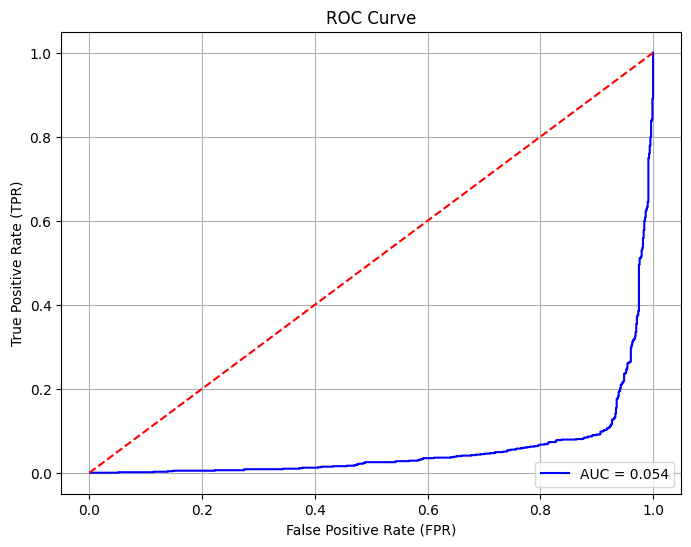

In [8]:
fprs, tprs, auc = calculate_roc_auc(predictions1, ground_truths1)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, label=f'AUC = {auc:.3f}', color='b')
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Model 2

In [10]:


# Load the saved model outputs from your file
with open('Models/model2_vmem_4810.pkl', 'rb') as f:
    model2a_outputs = pickle.load(f)

# Extract predictions and ground truths from the loaded dictionary
predictions2 = model2a_outputs.get('predictions', None)
ground_truths2 = model2a_outputs.get('ground_truths', None)

# Check if the data was loaded correctly
if predictions2 is None or ground_truths2 is None:
    raise ValueError("Predictions or ground_truths not found in the file.")

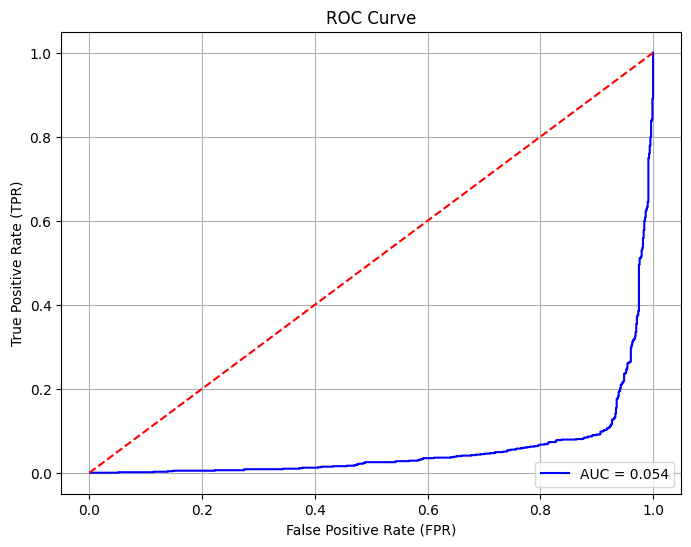

In [11]:
fprs, tprs, auc = calculate_roc_auc(predictions2, ground_truths2)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, label=f'AUC = {auc:.3f}', color='b')
plt.plot([0, 1], [0, 1], 'r--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
